Import libraries

In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the file

In [3]:
path = 'data/gps221231g002.hdf5'

file = h5py.File(path, 'r')

dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)


dataset1 = file['Data']['Array Layout']['2D Parameters']['tec'] # type: ignore
tec_array = np.array(dataset1)

file.close()


Form a pandas dataframe

In [4]:
df = pd.DataFrame(data_array)
df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec'], axis=1)
print(df.head())

DATETIME = '2022-12-31 00:02:30'
# LAT, LON = [55,70], [11,23] #RUOTSI
# LAT, LON = [65,69], [14,23] #NORRA NORRLAND
# LAT, LON = [61,65], [12,22] #SÖDRA NORRLAND
# LAT, LON = [59,61], [11,19] #SVEALAND
LAT, LON = [55,59], [11,17] #GÖTALAND


   gdlat  glon        tec      dtec            datetime
0  -90.0 -87.0  13.379775  1.304244 2022-12-31 00:02:30
1  -90.0 -64.0  12.532984  1.308896 2022-12-31 00:02:30
2  -90.0 -63.0  12.606239  1.308873 2022-12-31 00:02:30
3  -90.0 -62.0  12.483098  1.308849 2022-12-31 00:02:30
4  -90.0 -60.0  12.479731  1.308825 2022-12-31 00:02:30


Plot whole grid on one timestamp

1


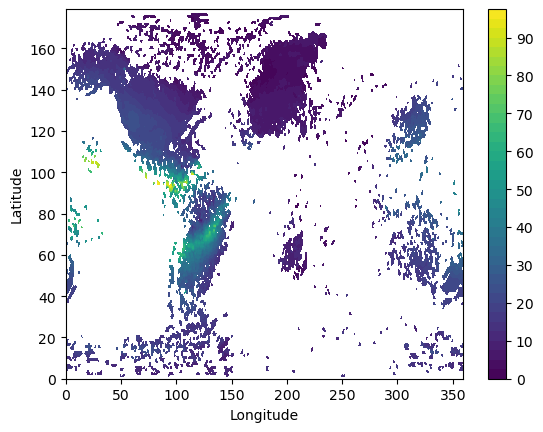

In [5]:
X, Y = np.meshgrid(np.arange(360), np.arange(180))
print(1)
plt.figure()
plt.contourf(X, Y, tec_array[:, :, 0], levels=40)

# Set the x-axis and y-axis labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(15, 30)
# plt.ylim(140, 170)
# Add a color bar
plt.colorbar()


C:\Users\virtanem\AppData\Local\Temp\ipykernel_16724\3944467151.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table=df1.pivot('gdlat', 'glon', 'tec')


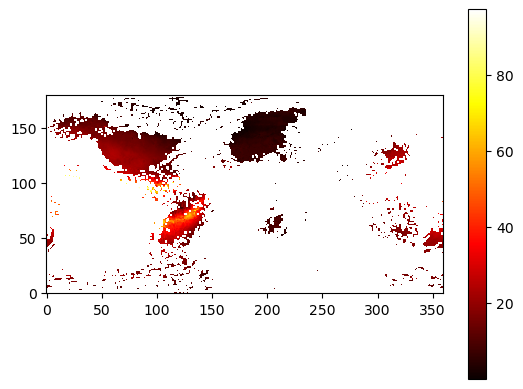

In [6]:
specific_datetime = pd.to_datetime(DATETIME)

# Create a boolean mask based on the condition
mask = df['datetime'] == specific_datetime

# Use the mask to filter the rows
df1 = df[mask]

pivot_table=df1.pivot('gdlat', 'glon', 'tec')

# Plot the heatmap
plt.imshow(pivot_table, cmap='hot')
plt.gca().invert_yaxis()

# Add colorbar
plt.colorbar()

# Show the plot
plt.show()

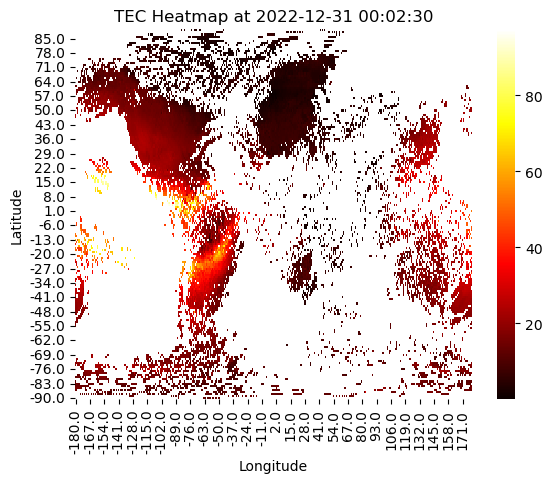

In [7]:
sns.heatmap(pivot_table, cmap='hot')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'TEC Heatmap at {DATETIME}')
plt.gca().invert_yaxis()

# Show the plot
plt.show()

Virhedata

In [8]:
path2 = 'data/ruots/gotaland.csv'
# path2 = 'data/ruots/norra_norrland.csv'
# path2 = 'data/ruots/sodra_norrland.csv'
# path2 = 'data/ruots/svealand.csv'

dfv = pd.read_csv(path2, header=None, sep=';')

In [9]:
dfv['datetime'] = pd.to_datetime(dfv[0])
dfv['tec'] = dfv[1].str.replace(',', '.').astype(float)
dfv.drop([0, 1], axis=1, inplace=True)
dfv

,datetime,tec
0,2013-04-18 14:40:30,2.067801
1,2013-04-18 14:41:00,2.082405
2,2013-04-18 14:41:30,2.092823
3,2013-04-18 14:42:00,2.107916
4,2013-04-18 14:42:30,2.116922
...,...,...
10353389,2023-04-11 11:23:30,4.883111
10353390,2023-04-11 11:24:00,4.858102
10353391,2023-04-11 11:24:30,4.840476
10353392,2023-04-11 11:25:00,4.812934
